In [3]:
# 1) We have the min and max temperatures in a city In India for each months of the year.
# We would like to find a function to describe this and show it graphically, the dataset given below.

# Task:
# 1.fitting it to the periodic function
# 2.plot the fit
# Data
# Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
# Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [5]:
import numpy as np 
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.io as pio

%matplotlib inline

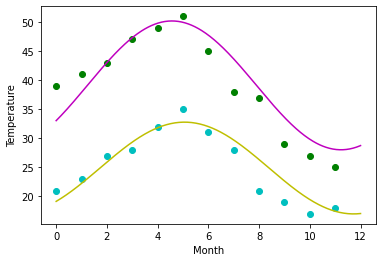

In [8]:
months = np.arange(12)
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

In [9]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\csv_files\sample-csv\train.csv')

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
print(df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [13]:
# Que1. Create a pie chart presenting the male/female proportion

In [15]:
import plotly.express as px
sex =df['Sex'].value_counts()

In [19]:
fig = px.pie(sex, values='Sex',names='Sex')
fig.show()

In [ ]:
# Que2:  Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

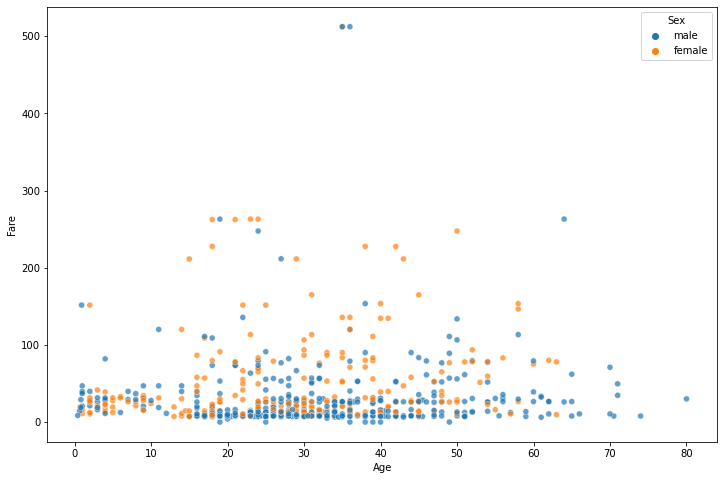

In [20]:
plt.figure(figsize=(12, 8))
ax=sns.scatterplot(x='Age', y='Fare', hue='Sex', data=df, alpha=0.7)